# Загрузка датасета и минимальная обработка

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset")
# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset


100%|██████████| 5.00M/5.00M [00:00<00:00, 154MB/s]

In [ ]:
import pandas as pd

df = pd.read_csv("/content/stellar-classification-dataset/StarClassificationDataset.csv")
df

<ipython-input-158-1bad462cecf7>:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/stellar-classification-dataset/StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


<ipython-input-94-33fd3eedb57c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='class', data = df, palette='hls')


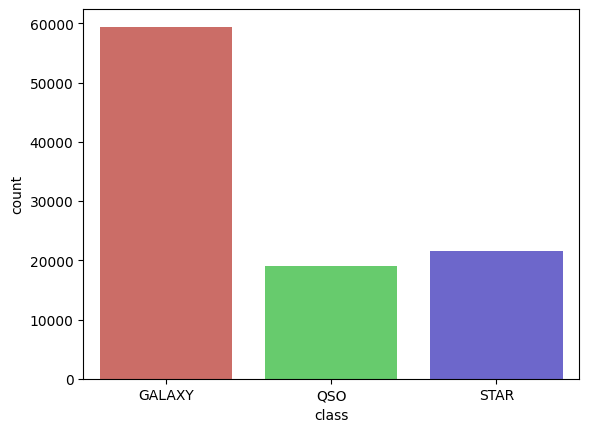

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='class', data = df, palette='hls')
plt.show()

In [ ]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


Данные показывают значительный дисбаланс классов:
- GALAXY (галактики) — 59,445 объектов (~52%).
- STAR (звезды) — 21,594 объектов (~19%).
- QSO (квазары) — 18,961 объектов (~17%).

**Вывод:**
1. Классы неравномерны, при этом галактики преобладают, а звезды и квазары встречаются почти в три раза реже.
2. Модель может быть смещена в сторону класса GALAXY, так как он доминирует в данных. Если не предпринять меры, алгоритм может чаще предсказывать GALAXY, игнорируя другие классы.
3. Нужны методы балансировки, которые мы сегодня и рассмотрим.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [ ]:
df.isna().sum().sum()

9

In [ ]:
df[df['alpha'] == "     "]

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
11,1.240000e+18,,25.73828,23.76761,23.79969,20.98318,19.80745,19.45579,3927,301,4,112,5.320000e+18,0.591409,4727,55693,855,GALAXY


In [ ]:
df.drop(index=11, inplace=True)

df['alpha'] = df['alpha'].astype('float')   # Приводим к float

df.shape

(99999, 18)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Закодируем целевую переменную
# Создание и применение LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

# Создание словаря соответствия
label_mapping = {class_name: index for index, class_name in enumerate(encoder.classes_)}

print(label_mapping)

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [ ]:
df.isna().sum().sum()

9

In [ ]:
# Удалим все объекты где есть пропуски
df.dropna(inplace=True)
# Удалим неинформативную колонку
df.drop(columns=['object_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'plate_ID', 'fiber_ID'], inplace=True)

# Возьмем только числовые колонки
numeric_cols = df.select_dtypes(include='number').columns
df = df[numeric_cols]

df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,cam_col,red_shift,MJD,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,56354,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,58158,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,55592,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,58039,0
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,3,1.424659,55855,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,0.000000,57749,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,0.404895,56934,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,0.143366,54535,0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,0.455040,56368,0


In [ ]:
df.shape

(99990, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99990 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99990 non-null  float64
 1   delta           99990 non-null  float64
 2   UV_filter       99990 non-null  float64
 3   green_filter    99990 non-null  float64
 4   red_filter      99990 non-null  float64
 5   near_IR_filter  99990 non-null  float64
 6   IR_filter       99990 non-null  float64
 7   cam_col         99990 non-null  int64  
 8   red_shift       99990 non-null  float64
 9   MJD             99990 non-null  int64  
 10  class           99990 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 9.2 MB


In [ ]:
# Разделение на признаки и целевой столбец
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевой столбец
X = df.drop(columns=['class'])
y = df['class']

# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(f'X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}, y test shape: {y_test.shape}')

X train shape: (79992, 10), y train shape: (79992,)
X test shape: (19998, 10), y test shape: (19998,)


In [ ]:
y_train.value_counts()

,count
class,
0,47549
2,17275
1,15168


In [ ]:
y_test.value_counts()

,count
class,
0,11887
2,4319
1,3792


**Балансировку лучше всего проводить на тренировочной подвыборке!! А test подвыборку оставлять чистов, для более объективной оценки модели.**

______________

Тут мы использовали с вами новый параметр метода разделения выборки на тренировочную и текстовую части: `stratify=y` - это параметр стратификации.

**Стратификация — это метод разбиения данных, при котором сохраняются пропорции классов.**

В нашем случае: у нас 3 класса в целевой переменной и Эти классы неравномерно распределены.

**Если разбить данные случайно, редкий класс может почти не попасть в тестовую выборку — тогда модель не сможет на нем учиться!**

`stratify=y` следит за тем, чтобы доля каждого класса в train и test оставалась такой же, как в исходных данных.

# Всё о балансировке

Большинство алгоритмов машинного обучения работают лучше всего, когда количество образцов в каждом классе примерно одинаково.

Однако если в датафреймах есть несбалансированные классы, то в таких случаях вы получаете довольно высокую точность, просто предсказывая класс большинства, но не можете охватить класс меньшинства, который чаще всего является целью создания модели в первую очередь.

Например, если распределение классов показывает, что 99% данных имеют класс большинства, то любая базовая модель классификации, такая как логистическая регрессия или дерево решений, не сможет идентифицировать точки данных второстепенного класса.

**Проблемы при дисбалансе классов:**

**1. Метрическая ловушка**

Использование более простых метрик, таких как `Accuracy`, может быть обманчивым. В наборе данных с сильно несбалансированными классами классификатор всегда будет «предсказывать» наиболее распространенный класс, не выполняя никакого анализа признаков, и он будет иметь высокую точность, очевидно, не правильную.

При этом, `Accuracy` может достигать и 90% точности, но, если мы начнем оценивать классификатор с других сторон, с помощью `Recall` или `Precision` мы можем увидеть, что они сильно хуже, чем `Accuracy`. Такой разброс сразу указывает на дисбаланс и не способности модели работать со малым классом.

**2. Смещение модели в сторону большинства**

Модель будет склонна предсказывать преобладающий класс.Может быть такое, например, что ваша модель всегда будет в качестве предсказания один класс возвращать, а классы с малым количеством наблюдений могут вообще не учитываться.

_____________

Когда в обучающем наборе данных доля примеров некоторого класса слишком мала, такие классы называются **миноритарными** (англ. minority), другие, со слишком большим количеством представителей, — **мажоритарными** (англ. majority)
___________________

**Какие бывают стратегии по решению дисбаланса (imbalance)**

1. **Cубдискретизация (under-sampling)** — удаление некоторого количества примеров мажоритарного класса.
2. **Передискретизации (over-sampling)** — увеличение количества примеров миноритарного класса.
3. Комбинирование **(сombining over- and under-sampling)** — последовательное применение субдискретизации и передискретизации.
4. **Ансамбль сбалансированных наборов (ensemble balanced sets)** — использование встроенных методов сэмплирования в процессе построения ансамблей классификаторов.

Также все методы можно разделить на две группы: случайные (недетерминированные) и специальные (детерминированные).

1. **Случайное сэмплирование (random sampling)** — для этого типа сэмплирования существует равная вероятность выбора любого конкретного элемента. Например, выбор 10 чисел в промежутке от 1 до 100. Здесь каждое число имеет равную вероятность быть выбранным.
2. **Сэплирование с заменой (sampling with replacement)** — здесь элемент, который выбирается первым, не должен влиять на вторую или любую другую выборку. Математически, ковариация равна нулю между двумя выборками. Мы должны использовать выборку с заменой, когда у нас большой набор данных. Потому что, если мы используем выборку без замены, то вероятность для каждого предмета, который будет выбран, будет изменяться, и она будет слишком сложной после определенного момента. Выборка с заменой может сказать нам, что чаще встречается в наших данных.
3. **Сэмплирование без замены (sampling without replacement)** — здесь то, что мы выбираем первым, повлияет на второе. Выборка без замены полезна, если набор данных мал. Математически, ковариация между двумя выборками не равна нулю.
4. **Стратифицированное сэмплирование (stratified sampling)** — в этом типе техники мы выбираем из определенной группы объектов из всей выборки. Из каждой группы извлекается одинаковое количество объектов, хотя группы имеют разные размеры. Кроме того, существует вариант, когда количество объектов, выбранных из каждой группы, пропорционально размеру этой группы.

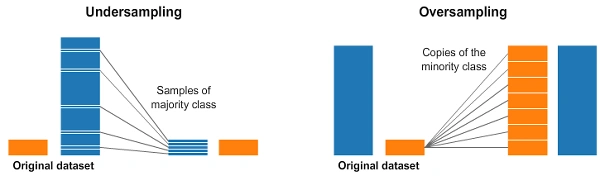

# Under-sampling

Сокращение числа примеров мажоритарного класса

## **Случайное удаление (random undesampling)**.

Это самая простая и примитивная стратегия, но понятная и несложная в реализации. Сначала определяется число $K$ примеров доминирующего класса, которое требуется удалить, чтобы достичь требуемого соотношения классов в обучающей выборке. Затем случайным образом выбираются $K$ наблюдений доминирующего класса и удаляются.

In [ ]:
y_train.value_counts()

,count
class,
0,47549
2,17275
1,15168


In [ ]:
# Объединяем X_train и y_train в один DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Количество объектов для каждого класса (на уровне миноритарного класса)
K = train_df[train_df['class'] == 1].shape[0]

# Сэмплируем K объектов для классов 0 и 2
df0 = train_df[train_df['class'] == 0].sample(K, random_state=42)
df2 = train_df[train_df['class'] == 2].sample(K, random_state=42)

# Берем все объекты класса 1 (миноритарный класс)
df1 = train_df[train_df['class'] == 1]

# Соединяем все вместе
df_rand_undersaml = pd.concat([df0, df2, df1])

# Разделяем обратно на X_train и y_train
X_train_rand_undersaml = df_rand_undersaml.drop(columns=['class'])
y_train_rand_undersaml = df_rand_undersaml['class']

# Проверка баланса классов
print(y_train_rand_undersaml.value_counts())

class
0    15168
2    15168
1    15168
Name: count, dtype: int64


Однако, при его использовании могут быть потеряны наблюдения, несущие полезную информацию. Поэтому предпочтительно сделать стратегию балансировки классов более управляемой, то есть выполняемой в соответствии с некоторыми правилами. Рассмотрим несколько таких стратегий.

## **Поиск связей Томека (Tomek Links)**

Tomek Links идентифицирует пары близких соседей, в которых один пример принадлежит классу меньшинства, а другой - классу большинства. Такие пары соседей называются Tomek Links. После их идентификации удаляется пример из класса большинства, что помогает уменьшить дисбаланс данных.

Процесс начинается с предварительной подготовки данных, должны быть размеченные данные с несбалансированными классами.

Для каждого примера данных мы вычисляем расстояния до всех остальных примеров. Затем для каждого примера из класса меньшинства мы ищем его ближайшего соседа из класса большинства и наоборот. Если расстояние между этими двумя примерами минимальное, они образуют Tomek Link.

После того как все Tomek Links были идентифицированы, мы удаляем примеры, которые находятся на концах этих связей из класса большинства. Это может быть сделано путем создания нового набора данных без этих точек.

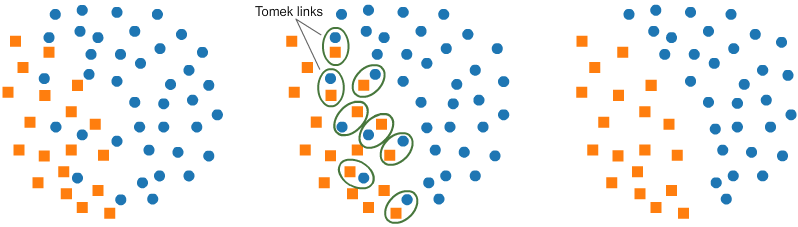

_____
Связка Томека — это пара соседних объектов из разных классов, которые находятся близко друг к другу. Если два объекта — ближайшие соседи, и они из разных классов, то объект из большинства классов удаляется. Это помогает очистить границы классов и улучшить разделение.
_____

Здесь и далее будем пользоваться специальной библиотекой, `imbalanced-learn` (`imblearn`) — это библиотека для борьбы с проблемами несбалансированных наборов данных. Она содержит много различных методов для проведения ресэмплинга (как для under, так и для over-sampling).

In [ ]:
y_train.value_counts()

,count
class,
0,47549
2,17275
1,15168


Документация: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

**sampling_strategy**

- `majority`: resample only the majority class;

- `not minority`: resample all classes but the minority class;

- `not majority`: resample all classes but the majority class;

- `all`: resample all classes;

- `auto`: equivalent to 'not minority'.

_____

TomekLinks — это метод очистки границ классов, а не точной балансировки по количеству. Он оставляет данные, если они далеко от границ, и убирает только потенциальные шумы или выбросы.
_____

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Применяем TomekLinks для очистки границ
tl = TomekLinks()

features_res, labels_res = tl.fit_resample(X_train, y_train)

features_res

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,cam_col,red_shift,MJD
0,181.904172,36.110637,19.62098,17.96384,17.39779,17.00553,16.76868,6,0.081765,53472
1,322.636993,12.045333,20.99745,19.98898,19.68992,19.58225,19.46711,5,-0.000348,53321
2,15.001055,0.290914,20.09701,19.43871,19.43089,18.90837,19.32385,4,0.088461,52254
3,240.426237,24.985452,19.98919,19.06738,18.72848,18.61398,18.53380,3,0.000010,55327
4,235.167298,43.627232,23.15212,21.02081,19.25077,18.56538,18.23825,1,0.471902,56102
...,...,...,...,...,...,...,...,...,...,...
75524,221.509098,37.234550,21.58865,20.07730,18.48312,17.91170,17.53129,5,0.312497,56047
75525,140.323619,25.745342,23.19093,21.00572,19.18672,18.56325,18.26271,2,0.352395,56269
75526,178.606316,-3.441993,20.05129,18.05466,17.11507,16.67958,16.34123,1,0.088483,52370
75527,47.930133,-0.543607,19.34729,18.31112,17.86567,17.54325,17.44307,2,0.113873,52203


In [ ]:
# удалили граничные объекты
labels_res.value_counts()

,count
class,
0,45180
2,15181
1,15168


In [ ]:
# А теперь используем RandomUnderSampler для точной балансировки
K = 12500

rus = RandomUnderSampler(sampling_strategy={0: K, 1: K, 2: K}, random_state=42)

balanced_Tomek, labels_resampled = rus.fit_resample(features_res, labels_res)

balanced_Tomek['class'] = labels_resampled

# Проверяем баланс классов
balanced_Tomek['class'].value_counts()

,count
class,
0,12500
1,12500
2,12500


## **NearMiss (ближайшие соседи)**

Выбирает объекты из мажоритарного класса, которые ближе всего к миноритарным классам. Есть три стратегии!

- `NearMiss-1`: оставляет объекты, ближайшие к $k$ соседям из меньшинства
- `NearMiss-2`: оставляет объекты, ближайшие к среднему расстоянию
- `NearMiss-3`: оставляет объекты, у которых наиболее близкие соседи из меньшинства

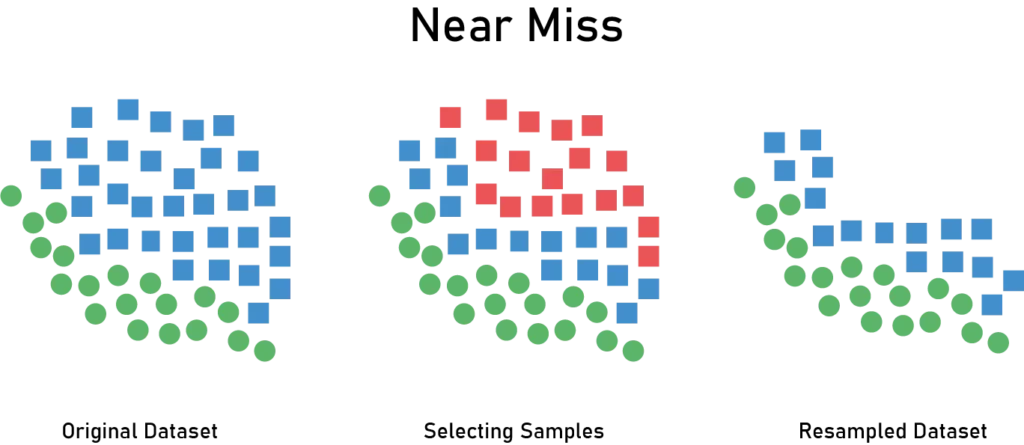

In [ ]:
y_train.value_counts()

,count
class,
0,47549
2,17275
1,15168


In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
df_NearMiss, y_res = nm.fit_resample(X_train, y_train)

df_NearMiss['class'] = y_res

df_NearMiss['class'].value_counts()

,count
class,
0,15168
1,15168
2,15168


# Over-sampling

Увеличение числа примеров миноритарного класса

## RandomOverSampler (случайная генерация объектов)

Этот метод просто дублирует случайные объекты из миноритарных классов до нужного количества. Самый простой способ увеличить данные.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Создаем экземпляр RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применяем oversampling к данным
df_rand_over, y_res = ros.fit_resample(X_train, y_train)

df_rand_over['class'] = y_res
# Проверка нового распределения классов
df_rand_over['class'].value_counts()

,count
class,
0,47549
2,47549
1,47549


## SMOTE (Synthetic Minority Over-sampling Technique)

Один из самых популярных методов.1 Он создает новые синтетические объекты на основе соседей меньшинства, а не просто копирует данные.

Для каждого объекта миноритарного класса генерируются новые точки на отрезке между ним и ближайшими соседями.

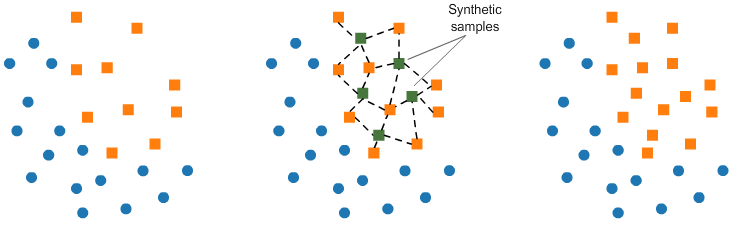

1. Поиск $k$-ближайших соседей:

Для каждого объекта миноритарного класса алгоритм находит k ближайших соседей (по умолчанию — 5).

2. Генерация новых объектов:

Новая синтетическая точка создается на отрезке между исходным объектом и одним из его соседей:

$$x_{new} = x_{original} + random(0,1) \cdot (x_{neighbor} - x_{original})$$


Здесь случайное число в диапазоне (0, 1) определяет, где именно на отрезке будет новая точка.

3. Повторение процесса:

Процесс повторяется, пока количество объектов миноритарного класса не сравняется с мажоритарным.

In [ ]:
y_train.value_counts()

,count
class,
0,47549
2,17275
1,15168


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Применение SMOTE к тренировочным данным
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Собираем всё обратно в DataFrame, если нужно
balanced_df_SMOTE = pd.DataFrame(X_train_res, columns=X.columns)
balanced_df_SMOTE['class'] = y_train_res

balanced_df_SMOTE['class'].value_counts()

,count
class,
0,47549
2,47549
1,47549


## ADASYN (Adaptive Synthetic Sampling)

Это улучшенная версия SMOTE, но с умным трюком:

Она генерирует больше синтетических данных для сложных случаев — объектов, которые сложнее классифицировать.

In [ ]:
from imblearn.over_sampling import ADASYN

# Создаем экземпляр ADASYN
adasyn = ADASYN(random_state=42)

# Применяем ADASYN
X_ADASYN, y_ADASYN = adasyn.fit_resample(X_train, y_train)

# Собираем всё обратно в DataFrame, если нужно
balanced_df_ADASYN = pd.DataFrame(X_ADASYN, columns=X.columns)
balanced_df_ADASYN['class'] = y_ADASYN

balanced_df_ADASYN['class'].value_counts()

,count
class,
0,47549
2,46164
1,45571


- Плюсы: лучше обрабатывает сложные границы классов
- Минусы: может создать больше шума, чем SMOTE, особенно на редких выбросах

# Обучение и тестирование моделей

Мы попробовали много разных стратегий семплирования, давайте посмотрим на поведение моделей ML при разных стратегиях:

- Under-sampling
    - `df_rand_undersaml` - Случайное удаление (random undesampling)
    - `balanced_Tomek` - Поиск связей Томека (Tomek Links) и Случайное удаление
    - `df_NearMiss` - NearMiss (ближайшие соседи)
- Over-sampling
    - `df_rand_over` - RandomOverSampler (случайная генерация объектов)
    - `balanced_df_SMOTE` - SMOTE
    - `balanced_df_ADASYN` - ADASYN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Функция для обучения и оценки модели
def train_and_evaluate(X_train, y_train, X_test, y_test, strategy_name):

    # Создаем и обучаем модель KNN
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Делаем предсказания на тестовых данных
    y_pred = model.predict(X_test)

    # Выводим результаты
    print(f"Результаты для стратегии: {strategy_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    # {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}
    print(f"f1_score macro: {f1_score(y_test, y_pred, average = 'macro'):.4f}")
    print(f"f1_score_weighted: {f1_score(y_test, y_pred, average = 'weighted'):.4f}")

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print("="*60)

    res = {'strategy_name': strategy_name,
           'Accuracy': accuracy_score(y_test, y_pred),
           "f1_score_macro": f1_score(y_test, y_pred, average = 'macro'),
           "f1_score_weighted": f1_score(y_test, y_pred, average = 'weighted')}

    return res

# df_rand_undersaml, balanced_Tomek, df_NearMiss
# df_rand_over, balanced_df_SMOTE, balanced_df_ADASYN

# Словарь с датасетами
datasets = {
    'Исходная выбока': (X_train, y_train),
    "Random Undersampling": (df_rand_undersaml.drop(columns=['class']), df_rand_undersaml['class']),
    "Tomek Links + Random Undersampling": (balanced_Tomek.drop(columns=['class']), balanced_Tomek['class']),
    "NearMiss": (df_NearMiss.drop(columns=['class']), df_NearMiss['class']),
    "Random Oversampling": (df_rand_over.drop(columns=['class']), df_rand_over['class']),
    "SMOTE": (balanced_df_SMOTE.drop(columns=['class']), balanced_df_SMOTE['class']),
    "ADASYN": (balanced_df_ADASYN.drop(columns=['class']), balanced_df_ADASYN['class'])
}

# Разбиваем на train/test и оцениваем каждую стратегию
results = []
for strategy, (X_balanced, y_balanced) in datasets.items():
    results.append(train_and_evaluate(X_balanced, y_balanced, X_test, y_test, strategy))

Результаты для стратегии: Исходная выбока
Accuracy: 0.9654
f1_score macro: 0.9601
f1_score_weighted: 0.9655

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11887
           1       0.91      0.91      0.91      3792
           2       1.00      0.99      1.00      4319

    accuracy                           0.97     19998
   macro avg       0.96      0.96      0.96     19998
weighted avg       0.97      0.97      0.97     19998

Результаты для стратегии: Random Undersampling
Accuracy: 0.9534
f1_score macro: 0.9481
f1_score_weighted: 0.9543

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11887
           1       0.84      0.94      0.89      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.95     19998
   macro avg       0.94      0.96      0.95     19998
weighted avg       0.9

In [ ]:
pd.DataFrame(results)

,strategy_name,Accuracy,f1_score_macro,f1_score_weighted
0,Исходная выбока,0.965447,0.960080,0.965455
1,Random Undersampling,0.953445,0.948110,0.954286
2,Tomek Links + Random Undersampling,0.951345,0.946187,0.952367
3,NearMiss,0.921492,0.915905,0.924111
4,Random Oversampling,0.965047,0.959461,0.965001
5,SMOTE,0.963196,0.958137,0.963487
6,ADASYN,0.957046,0.951501,0.957565
